In [1]:
# ======================================
# K-Means Clustering - Cell 1
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans

pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv("kmeans_large_dataset.csv")

# Preview dataset
display(df.head())
df.info()


,feature_1,feature_2
0,2.496714,1.861736
1,2.647689,3.523030
2,1.765847,1.765863
3,3.579213,2.767435
4,1.530526,2.542560


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  300 non-null    float64
 1   feature_2  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [2]:
# ======================================
# Data Preprocessing - Cell 2
# ======================================

# Select numeric columns only
X = df.select_dtypes(include=["int64", "float64"])

# Handle missing values
X = X.fillna(X.mean())

print("Shape before scaling:", X.shape)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape after scaling:", X_scaled.shape)


Shape before scaling: (300, 2)
Shape after scaling: (300, 2)


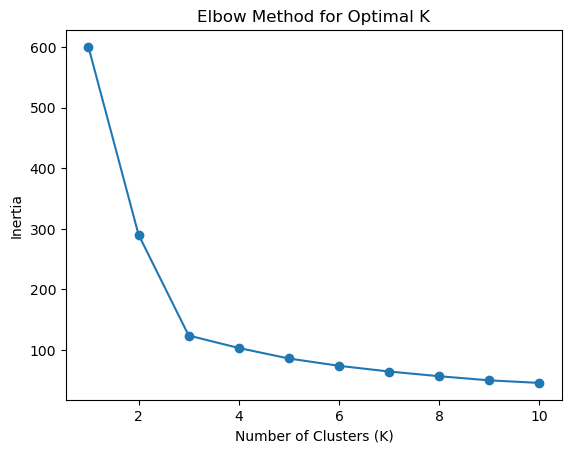

In [3]:
# ======================================
# Elbow Method - Cell 3
# ======================================

inertia = []

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure()
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [4]:
# ======================================
# K-Means Clustering - Cell 4
# ======================================

kmeans = KMeans(
    n_clusters=5,
    random_state=42,
    n_init=10
)

clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["cluster"] = clusters

display(df.head())


,feature_1,feature_2,cluster
0,2.496714,1.861736,0
1,2.647689,3.523030,0
2,1.765847,1.765863,0
3,3.579213,2.767435,0
4,1.530526,2.542560,0


In [5]:
# ======================================
# Cluster Distribution - Cell 5
# ======================================

df["cluster"].value_counts().sort_index()


cluster
0    72
1    77
2    69
3    38
4    44
Name: count, dtype: int64

In [6]:
# ======================================
# Cluster Centers - Cell 6
# ======================================

centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

centers_df = pd.DataFrame(centers, columns=X.columns)
display(centers_df)


,feature_1,feature_2
0,1.685233,2.481111
1,2.145486,-2.397917
2,-2.391451,-1.900457
3,2.415680,0.623999
4,-0.376368,-2.078571


In [7]:
# ======================================
# MiniBatch K-Means - Cell 7
# ======================================

mbk = MiniBatchKMeans(
    n_clusters=5,
    batch_size=1024,
    random_state=42
)

df["cluster"] = mbk.fit_predict(X_scaled)

display(df.head())


,feature_1,feature_2,cluster
0,2.496714,1.861736,1
1,2.647689,3.523030,1
2,1.765847,1.765863,1
3,3.579213,2.767435,1
4,1.530526,2.542560,1


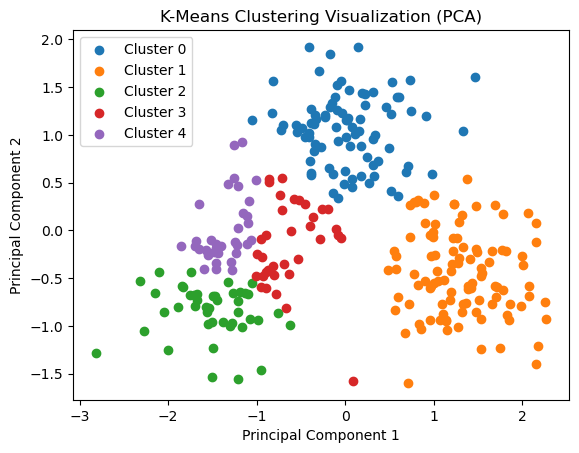

In [8]:
# ======================================
# Cluster Visualization using PCA
# ======================================

from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
plot_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_df["cluster"] = df["cluster"]

# Plot
plt.figure()
for c in sorted(plot_df["cluster"].unique()):
    cluster_data = plot_df[plot_df["cluster"] == c]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {c}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization (PCA)")
plt.legend()
plt.show()
